In [42]:
import numpy as np 
import pandas as pd
import ants

from tqdm import tqdm
from umap import UMAP
from matplotlib import pyplot as plt

In [6]:
df = pd.read_csv('../Data/ABIDE_legend_S982.csv')
patients = df['DxGroup'].values==1
df_asd = df.iloc[patients]

In [9]:
subs = df_asd['BIDS_ID'].values

In [12]:
fn_temp = '../../jacobians/normed_Js_masked/{}_normed_Js_masked.nii'

In [16]:
ims = [ants.image_read(fn_temp.format(sub)) for sub in tqdm(subs)]

100%|██████████| 470/470 [00:03<00:00, 150.69it/s]


In [37]:
flatmap = np.array([im.numpy().flatten() for im in ims])
flatmap = flatmap[:,((flatmap**2).sum(axis=0)!=0)]
flatmap.shape

(470, 55432)

In [97]:
j_emb = UMAP().fit_transform(flatmap)

In [60]:
#temp = [UMAP().fit_transform(flatmap) for _ in tqdm(range(10))]

In [66]:
#np.save(file='../Data/j_pca.npy', arr=j_pca)

In [61]:
from sklearn.decomposition import PCA
j_pca = PCA().fit_transform(j_emb)

In [76]:
flatmap = np.array([im.numpy().flatten() for im in ims])

In [98]:
j_pca = j_emb

In [99]:
xcorr = np.array([np.corrcoef(flatmap[:,v],j_pca[:,0])[0,1] for v in tqdm(range(flatmap.shape[1]))])

  0%|          | 0/262144 [00:00<?, ?it/s]/data/aglinska/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning:

invalid value encountered in true_divide

/data/aglinska/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning:

invalid value encountered in true_divide

100%|██████████| 262144/262144 [00:19<00:00, 13509.17it/s]


In [100]:
ycorr = np.array([np.corrcoef(flatmap[:,v],j_pca[:,1])[0,1] for v in tqdm(range(flatmap.shape[1]))])

100%|██████████| 262144/262144 [00:19<00:00, 13599.94it/s]


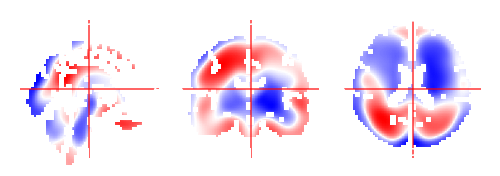

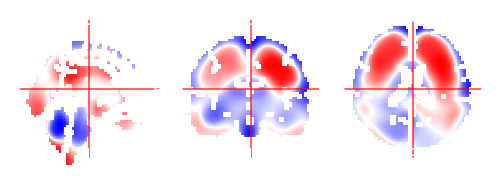

In [101]:
ims[0].new_image_like(xcorr.reshape((64,64,64))).plot_ortho(flat=True,black_bg=True,cmap='bwr')
ims[0].new_image_like(ycorr.reshape((64,64,64))).plot_ortho(flat=True,black_bg=True,cmap='bwr')

In [102]:
ims[0].new_image_like(xcorr.reshape((64,64,64))).to_filename('../../xcorr.nii')
ims[0].new_image_like(ycorr.reshape((64,64,64))).to_filename('../../ycorr.nii')